# Pandas로 하는 시계열 데이터분석 (T아카데미)

참고: https://tacademy.skplanet.com/frontMain.action

1. Time series 데이터 처리 with pandas


2. 시계열 데이터 특성
    1. Trend (추세)
    - Seasonality (반복트렌드) 
    - Cyclical (일정하지않은 기간의 트렌드)
    - Noise, Random movement    


3. ETS 모델, ETS Decomposition
      1. additive Model
      2. Multiplicative Model
        
        
4. SMA, WMA, SES모델
    1. SMA : simple moving average
    - WMA : weighted moving average
    - SES : Simple Exponential Smoothing (단일지수평활)
    - Holt's, Holt-Winter's (1965)


5. ARIMA 모델
    1. Stationary vs Non-stationary time series
    - Seasonal vs Non-seasonal ARIMA
    - AR, MA, ARIMA


6. Prophet 사용하기



In [1]:
# git을 설치한다.
# https://git-scm.com/
!git --version

git version 2.21.0.windows.1


In [2]:
#!git clone https://github.com/midnightradio/tsa-tutorial.git

In [ ]:
# 실습에 필요한 패키지
# pandas version or later
# numpy version 1.15.4 or later
# matplotlib version 3.0.2 or later
# seaborn version 0.9.0 or later
# pandas version 0.23.4 or later
# scikit-learn 0.20.2 or later
# jupyter version 1.0.0 or later
# statsmodels version 0.9.0 or later

In [ ]:
# 1. Time series 데이터 처리 with pandas
# 시계열데이터는 시간데이터를 인덱스로 하는 연속된 데이터이다.
# (1) Datetime index
# (2) time resampling 
# (3) time shifting
# (4) rolling and expanding 

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [40]:
pd.read_csv?

In [41]:
today= datetime(2019,1,24, 13, 39)

In [42]:
a= pd.datetime(2019,1,24)

In [43]:
today

datetime.datetime(2019, 1, 24, 13, 39)

In [44]:
print(today.day, today.month, today.year)

24 1 2019


In [45]:
dates=[datetime(2019,1,23), datetime(2019,1,24)]
dt_index= pd.DatetimeIndex(dates)
dt_index

DatetimeIndex(['2019-01-23', '2019-01-24'], dtype='datetime64[ns]', freq=None)

In [46]:
df= pd.DataFrame(data= np.random.randn(2,2), index= dt_index, columns= ['A', 'B'])
df

,A,B
2019-01-23,-0.577542,-0.568507
2019-01-24,-0.312343,-0.946131


In [47]:
pd.DataFrame(data= np.random.randn(2,2), columns= ['A', 'B'])

,A,B
0,0.601377,0.413657
1,0.106312,0.657602


In [48]:
df.index

DatetimeIndex(['2019-01-23', '2019-01-24'], dtype='datetime64[ns]', freq=None)

In [49]:
# Resampling

df= pd.read_csv('./tsa-tutorial/data/apple_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
1,2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2,2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
3,2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
4,2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 7 columns):
Date         2265 non-null object
High         2265 non-null float64
Low          2265 non-null float64
Open         2265 non-null float64
Close        2265 non-null float64
Volume       2265 non-null float64
Adj Close    2265 non-null float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB


In [51]:
df['Date']= df['Date'].apply(pd.to_datetime) 
# 다른방법
#df['Date']= pd.to_datetime(df['Date'])

In [52]:
df.set_index('Date', inplace= True)

In [53]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [54]:
df.index.month

Int64Index([12,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Date', length=2265)

In [55]:
df['month']= df.index.month
df.head()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902,1
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680,1
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369,1


In [56]:
df.groupby('month').agg(sum) # agg ???

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [57]:
df.groupby('month').sum() # agg ???

,High,Low,Open,Close,Volume,Adj Close
month,,,,,,
1,16141.351418,15840.451458,16007.617104,15989.401403,1.748822e+10,14038.491524
2,15739.942860,15445.045748,15572.844261,15607.478556,1.511651e+10,13799.143261
3,18676.318544,18358.607164,18522.812897,18516.759998,1.646522e+10,16387.278601
4,17763.422855,17444.350006,17612.804337,17595.992851,1.656252e+10,15549.686649
5,18874.642849,18552.902849,18711.531479,18731.747120,1.595049e+10,16741.255772
6,19040.630035,18743.354290,18909.838608,18881.168510,1.427367e+10,16927.685444
7,18908.574245,18616.531422,18760.998562,18775.181419,1.403693e+10,16779.291849
8,21322.417149,20943.891430,21113.692909,21152.527245,1.505109e+10,19060.226547
9,19596.267178,19222.517181,19423.325752,19400.800022,1.547466e+10,17478.810833


In [58]:
df.groupby([df.index.year, df.index.month]).agg(sum)

High          Low         Open        Close        Volume  \
Date Date                                                                     
2009 12      30.478571    30.080000    30.447144    30.104286  8.810270e+07   
2010 1      573.331425   557.244289   568.397141   563.798571  3.792249e+09   
     2      544.092857   532.875715   537.678570   539.588568  2.694020e+09   
     3      738.235716   727.080000   732.047146   734.064285  3.038543e+09   
     4      759.410004   744.359997   753.004292   753.445721  3.091782e+09   
     5      730.337135   699.494276   719.941429   718.461422  4.520664e+09   
     6      832.535709   812.074276   824.641434   820.742855  4.162813e+09   
     7      775.377140   753.262863   766.438568   764.849998  3.917426e+09   
     8      797.491417   783.245712   790.775719   789.872864  2.397280e+09   
     9      827.359993   811.739990   818.522850   821.552849  2.962480e+09   
     10     909.855713   893.007137   901.279999   902.802849  3.058644e+09   
     11     941.915722   926.407131   934.340004   934.764286  2.377022e+09   
     12    1015.334286  1005.722858  1011.407139  1010.384293  1.743309e+09   
2011 1      973.799992   955.328583   964.618561   966.800003  2.710384e+09   
     2      958.600002   944.887138   950.895706   953.210007  2.323987e+09   
     3     1151.114277  1131.195709  1143.562855  1141.755714  2.826615e+09   
     4      981.997139   965.321423   975.171432   972.615704  2.313457e+09   
     5     1032.851433  1018.240005  1025.958569  1025.354282  1.728015e+09   
     6     1051.567142  1031.604290  1043.190010  1040.541424  2.315963e+09   
     7     1071.921425  1050.395718  1058.758564  1063.537140  2.663487e+09   
     8     1254.649998  1219.489994  1239.569992  1237.934288  4.035650e+09   
     9     1191.664288  1164.200008  1177.138565  1177.480000  2.994362e+09   
     10    1205.449989  1174.577141  1190.231430  1191.690002  3.285357e+09   
     11    1166.638569  1145.058582  1158.804287  1154.445717  2.240925e+09   
     12    1186.994286  1170.418564  1178.311428  1178.791431  1.576633e+09   
2012 1     1231.452858  1216.601433  1225.028564  1224.508568  1.714964e+09   
     2     1430.997147  1404.107147  1413.722862  1421.631432  2.842139e+09   
     3     1829.345703  1792.201431  1812.982857  1815.024284  3.896084e+09   
     4     1758.535728  1710.428566  1741.735703  1731.437141  3.899748e+09   
     5     1798.158585  1754.962852  1778.181435  1774.687134  2.776586e+09   
...                ...          ...          ...          ...           ...   
2016 7     1983.279999  1960.049995  1969.019989  1971.129997  6.857796e+08   
     8     2487.230011  2460.689995  2471.650002  2476.300018  6.301285e+08   
     9     2346.650017  2305.960007  2324.140015  2327.999992  9.680156e+08   
     10    2444.150002  2413.769981  2430.619980  2429.850006  6.869143e+08   
     11    2332.439995  2288.760017  2311.729988  2313.239990  7.213055e+08   
     12    2415.529991  2384.449997  2393.909988  2401.050003  6.087717e+08   
2017 1     2397.619995  2375.710007  2381.869987  2391.399994  5.631220e+08   
     2     2549.070007  2523.899986  2531.460014  2540.569977  5.749686e+08   
     3     3247.550003  3213.309982  3228.330002  3234.210007  5.616284e+08   
     4     2728.360001  2704.219986  2717.570023  2714.849991  3.733041e+08   
     5     3367.349991  3324.390015  3343.249985  3349.009979  6.539818e+08   
     6     3279.949997  3224.819992  3260.730026  3252.289963  6.841781e+08   
     7     2983.529999  2942.110031  2961.930008  2965.989990  4.220119e+08   
     8     3683.490021  3629.480026  3655.780029  3657.490036  6.610690e+08   
     9     3177.390030  3128.930008  3162.180008  3152.169998  6.803741e+08   
     10    3488.910004  3446.750031  3461.829956  3471.979996  5.042913e+08   
     11    3641.990005  3590.809998  3622.299988  3620.530014  6.006634e+08   
     12    3457.709991  3416.970016  3434.439987  3437.830002  5.308

In [59]:
# time series offset string ???
df.groupby(df.index.year).mean()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12.000000
2010,37.481258,36.692517,37.136803,37.120351,1.498263e+08,24.858119,6.583333
2011,52.489082,51.471100,52.008775,52.000618,1.230747e+08,34.822880,6.547619
2012,83.117914,81.417309,82.378960,82.292817,1.319642e+08,56.076387,6.500000
2013,68.234132,66.892443,67.589734,67.519269,1.016087e+08,53.083607,6.543651
2014,93.012664,91.475538,92.219830,92.264654,6.315273e+07,84.295298,6.551587
2015,121.244524,118.863095,120.175754,120.040000,5.183789e+07,112.931425,6.567460
2016,105.427183,103.690278,104.507778,104.604008,3.841516e+07,100.449894,6.555556
2017,151.406056,149.487650,150.444900,150.551075,2.713317e+07,147.299024,6.533865


In [60]:
df.resample(rule='A').mean()

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,8.810270e+07,20.159719,12.000000
2010-12-31,37.481258,36.692517,37.136803,37.120351,1.498263e+08,24.858119,6.583333
2011-12-31,52.489082,51.471100,52.008775,52.000618,1.230747e+08,34.822880,6.547619
2012-12-31,83.117914,81.417309,82.378960,82.292817,1.319642e+08,56.076387,6.500000
2013-12-31,68.234132,66.892443,67.589734,67.519269,1.016087e+08,53.083607,6.543651
2014-12-31,93.012664,91.475538,92.219830,92.264654,6.315273e+07,84.295298,6.551587
2015-12-31,121.244524,118.863095,120.175754,120.040000,5.183789e+07,112.931425,6.567460
2016-12-31,105.427183,103.690278,104.507778,104.604008,3.841516e+07,100.449894,6.555556
2017-12-31,151.406056,149.487650,150.444900,150.551075,2.713317e+07,147.299024,6.533865


In [61]:
def first_day(sample):
    return sample[0]

df.resample(rule='A').apply(first_day)

,High,Low,Open,Close,Volume,Adj Close,month
Date,,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719,12
2010-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503,1
2011-12-31,47.180000,46.405716,46.520000,47.081429,111284600.0,31.528688,1
2012-12-31,58.928570,58.428570,58.485714,58.747143,75555200.0,39.340778,1
2013-12-31,79.285713,77.375717,79.117142,78.432854,140129500.0,55.923737,1
2014-12-31,79.575714,78.860001,79.382858,79.018570,58671200.0,67.251503,1
2015-12-31,111.440002,107.349998,111.389999,109.330002,53204600.0,101.963631,1
2016-12-31,105.370003,102.000000,102.610001,105.349998,67649400.0,99.925850,1
2017-12-31,116.330002,114.760002,115.800003,116.150002,28781900.0,112.620964,1


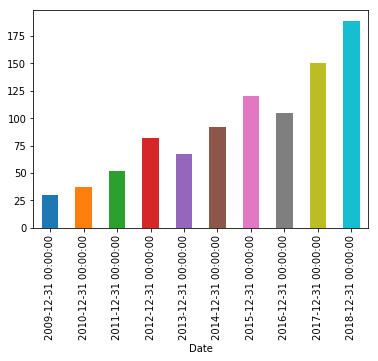

In [62]:
df['Close'].resample('A').mean().plot(kind='bar') # 종가의 연 평균을 plot 하라.

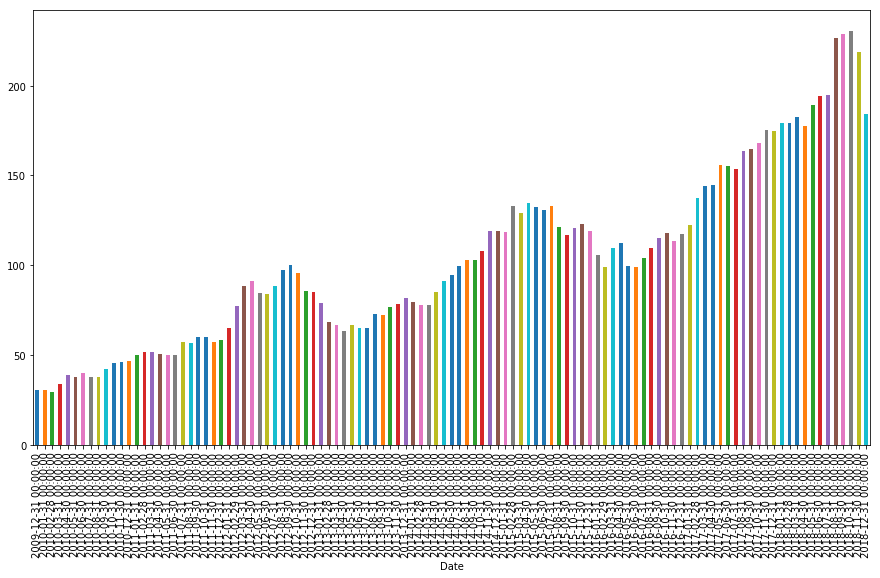

In [63]:
df['Open'].resample('M').max().plot(kind='bar', figsize=(15,8))

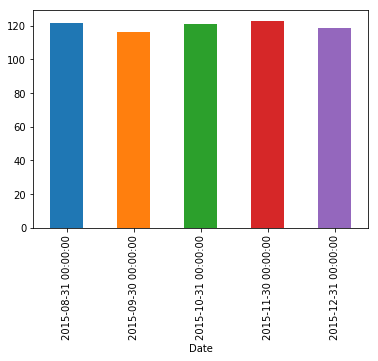

In [64]:
df['Open']['2015-8':'2015-12'].resample('M').max().plot(kind='bar') # 범위 셀렉션

In [65]:
pd.date_range(start=datetime(2018,9,1), end=datetime(2019,1,24), freq='M')

DatetimeIndex(['2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'], dtype='datetime64[ns]', freq='M')

In [66]:
pd.date_range(start=datetime(2018,9,1), end=datetime(2019,1,24), freq='B') # 비즈니스 데이만 인덱싱

DatetimeIndex(['2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06',
               '2018-09-07', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14',
               ...
               '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24'],
              dtype='datetime64[ns]', length=104, freq='B')

In [67]:
daily_daterange= pd.date_range(start=datetime(2018,9,1), end=datetime(2019,1,24), freq='B')
daily_dataset= pd.DataFrame(data={'value':np.random.rand(len(daily_daterange))}, index= daily_daterange)
daily_dataset.head(10)

,value
2018-09-03,0.441435
2018-09-04,0.966665
2018-09-05,0.238151
2018-09-06,0.037890
2018-09-07,0.700784
2018-09-10,0.978090
2018-09-11,0.509460
2018-09-12,0.799839
2018-09-13,0.942835
2018-09-14,0.605945


In [68]:
daily_dataset.resample('W-MON').min() # 해당 주의 월요일

,value
2018-09-03,0.441435
2018-09-10,0.037890
2018-09-17,0.509460
2018-09-24,0.072668
2018-10-01,0.428251
2018-10-08,0.053444
2018-10-15,0.026532
2018-10-22,0.063142
2018-10-29,0.014589
2018-11-05,0.175471


In [69]:
daily_dataset.resample('M').min() # 해당월의 마지막날

,value
2018-09-30,0.037890
2018-10-31,0.014589
2018-11-30,0.218505
2018-12-31,0.077797
2019-01-31,0.007115


In [70]:
# Shifting
df= pd.read_csv('./tsa-tutorial/data/apple_stock.csv', index_col='Date') # index_col의 사용
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [71]:
df.index= pd.to_datetime(df.index)
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [72]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [73]:
temp= np.asarray(df['Close'])

In [74]:
temp[1:] # temp[:-1]

array([ 30.5728569 ,  30.62571335,  30.13857079, ..., 156.1499939 ,
       156.22999573, 157.74000549])

In [75]:
df.shift(1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-05,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-06,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-07,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680


In [76]:
df.shift(-1).head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-04,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-05,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-06,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369
2010-01-07,30.285715,29.865715,30.042856,30.282858,111902700.0,20.279305


In [77]:
df.tshift(freq='M', periods=1).head() # ???

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-31,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-31,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-31,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-31,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [78]:
# Rolling & Expanding

df= pd.read_csv('./tsa-tutorial/data/apple_stock.csv', index_col='Date', parse_dates= True) # parse_dates 의 사용
# df= pd.read_csv('./tsa-tutorial/data/apple_stock.csv', index_col='Date', parse_dates= ['Date'])
df.head()



,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [79]:
df.index

DatetimeIndex(['2009-12-31', '2010-01-04', '2010-01-05', '2010-01-06',
               '2010-01-07', '2010-01-08', '2010-01-11', '2010-01-12',
               '2010-01-13', '2010-01-14',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=2265, freq=None)

In [80]:
def dateparser(str_dt):
    return pd.datetime.strptime(str_dt, '%Y-%m-%d')

In [81]:
dateparser('2019-01-01')

datetime.datetime(2019, 1, 1, 0, 0)

In [82]:
df= pd.read_csv('./tsa-tutorial/data/apple_stock.csv', 
                index_col='Date', 
                parse_dates= ['Date'],
               date_parser= dateparser)

In [83]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,30.478571,30.080000,30.447144,30.104286,88102700.0,20.159719
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,20.473503
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,20.508902
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,20.182680
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,20.145369


In [84]:
df.rolling(7).mean().head(10) # 이동평균 (7일)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,30.523878,30.071429,30.416122,30.260408,120970600.0,20.264270
2010-01-12,30.450816,29.986939,30.335714,30.198980,129615200.0,20.223133
2010-01-13,30.377959,29.817959,30.222245,30.130408,133621000.0,20.177213


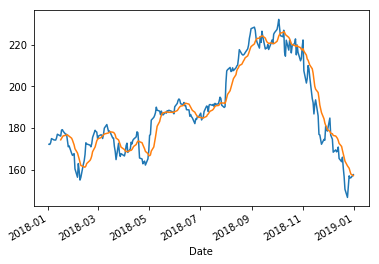

In [85]:
df['Close']['2018':].plot()
df['Close']['2018':].rolling(window=10).mean().plot()
# df['2018':].rolling(window=30).mean()['Close'].plot() # 상기동일

In [86]:
df['Close_30MA'] = df['Close'].rolling(30).mean()

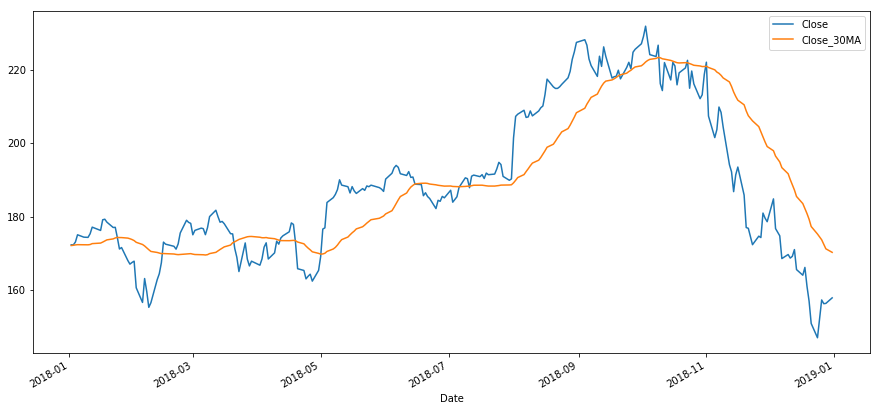

In [87]:
df[['Close', 'Close_30MA']]['2018':].plot(figsize=(15,7))

In [88]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

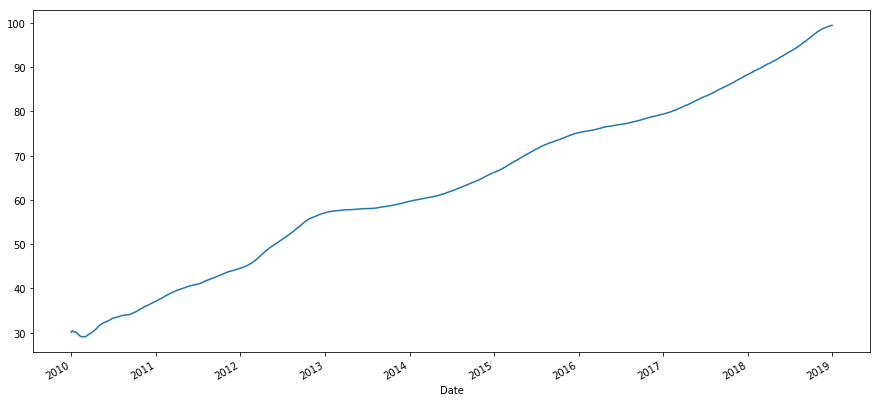

In [89]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(15,7)) # 누적평균

In [90]:
# 볼린저 밴드 만들기
# 볼린저 정의 ??
# 평균회귀전략, 볼린저밴드, RSI등 과매수, 과매도를 나타내는 많은 지표들은 평균회귀전략이라고 할수있다.
# 표준정규분포 z-score= (close - mu) / std --> z-score가 1.96과 -1.96사이는 95%, 1과 -1사이는 0.68%
# 평균회귀성을 확인하는 방법? 정상성지표, adf와 허스트지수

# Close, 20MA, Upper(20MA+2*std Close), Lower(20MA-2*std Close)


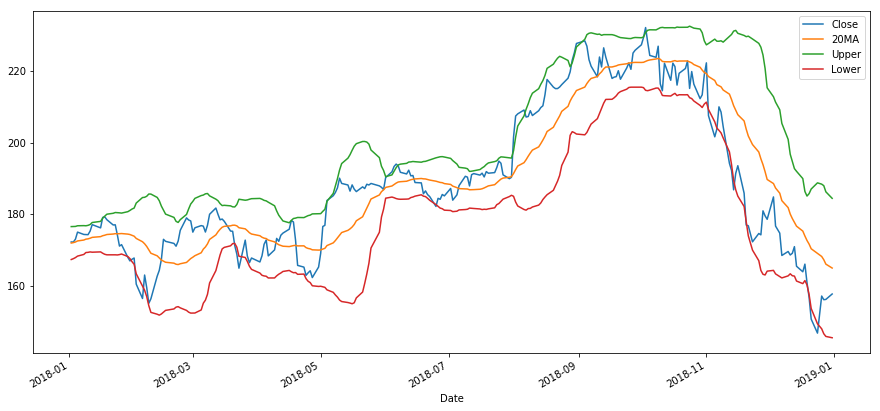

In [91]:
df['20MA']= df['Close'].rolling(window=20).mean()
df['Upper']= df['20MA'] + 2 * df['Close'].rolling(20).std()
df['Lower']= df['20MA'] - 2 * df['Close'].rolling(20).std()
df[['Close','20MA','Upper','Lower']]['2018':].plot(figsize=(15,7))

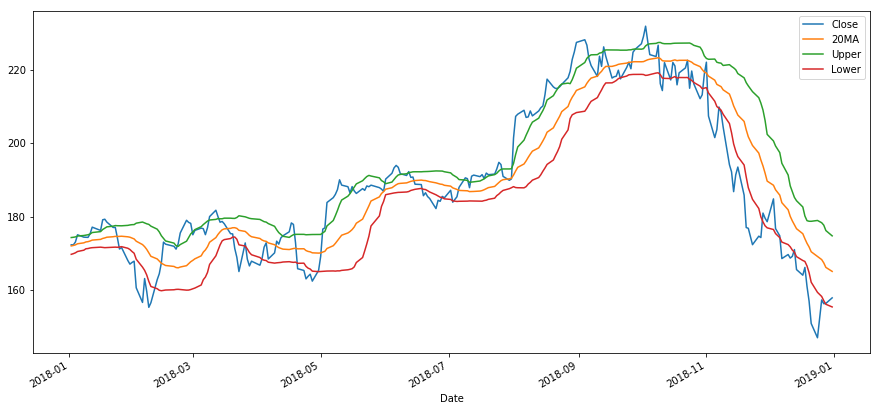

In [92]:
df['20MA']= df['Close'].rolling(window=20).mean()
df['Upper']= df['20MA'] + 1 * df['Close'].rolling(20).std()
df['Lower']= df['20MA'] - 1 * df['Close'].rolling(20).std()
df[['Close','20MA','Upper','Lower']]['2018':].plot(figsize=(15,7))





In [93]:
df_apple = pd.read_csv('./tsa-tutorial/data/apple_stock.csv', 
                index_col='Date', 
                parse_dates= ['Date'])

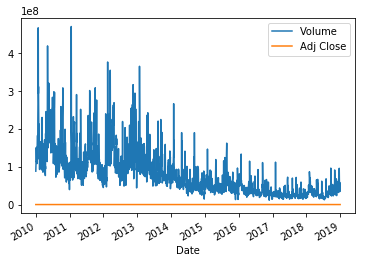

In [94]:
df_apple[['Volume', 'Adj Close']].plot()

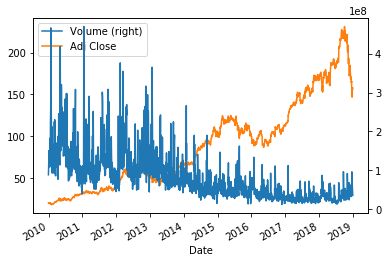

In [95]:
df_apple[['Volume', 'Adj Close']].plot(secondary_y=['Volume'])

AttributeError: 'numpy.str_' object has no attribute 'toordinal'

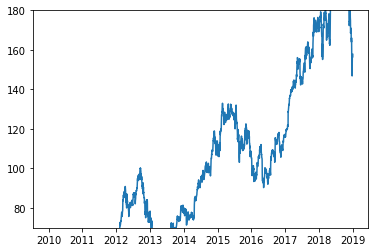

In [96]:
#df_apple['Close']['2015-01-01':'2018-01-01'].plot()
df_apple['Close'].plot(xlim=['2015-01-01','2018-01-01'], ylim=[70,180])

In [ ]:
# 구분
# pandas로 그래프그리기
# 맷플롭리브로 그래프그리기

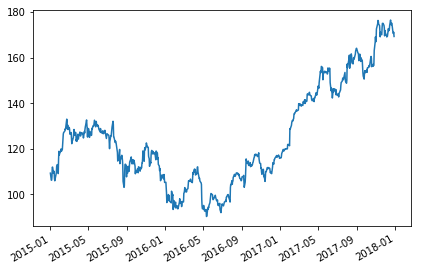

In [97]:
index= df_apple['2015-01-01':'2018-01-01'].index
stock= df_apple['2015-01-01':'2018-01-01']['Close']
fig, ax= plt.subplots()
ax.plot(index, stock)
#ax.plot_date(index, stock, '-') # 어떤 차이?
plt.tight_layout()
fig.autofmt_xdate() # x축 겹쳤을때 알아서 레이아웃 고쳐줌

In [ ]:
# 시계열데이터의 특성 설명
# (1) Trend (추세)
# (2) Seasonality (반복트렌드) 
# (3) Cyclical (일정하지않은 기간의 트렌드)
# (4) Noise, Random movement


# ETS 모델

# additive 모델
# y_t = Level + Trend + Seasonality + Noise(Error)
# y_t = Error + Trend + Seasonality
# Multiplicative Model
# y_t = Level * Error * Trend * Seasonality
# log(y_t)= Level + Error + Trend + Seasonality


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [10]:
series= pd.Series([i+np.random.randint(10) for i in range(1,100)])

In [12]:
result= seasonal_decompose(series, model='additive', freq=2) # additive모델이 디폴트임. freq=???

In [13]:
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('Observerd')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('Trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('Seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('Resid')

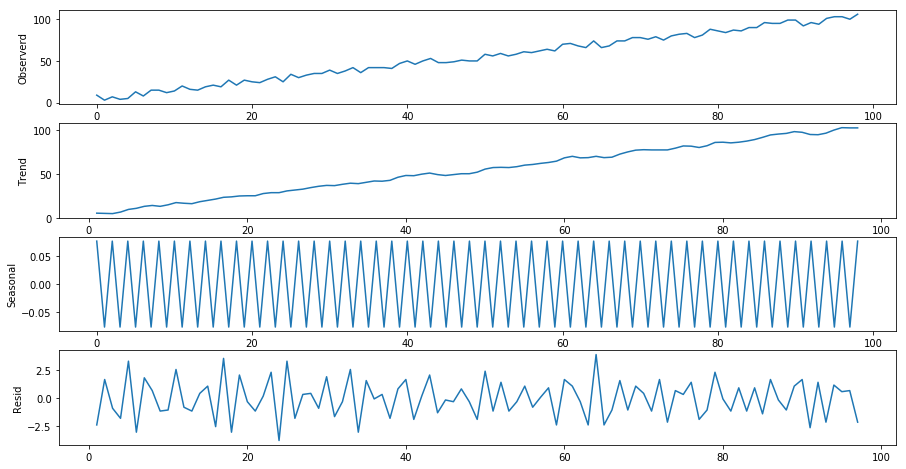

In [14]:
plot_decompose(result)

In [16]:
series= pd.Series([i+np.random.randint(10) for i in range(100)], 
                  index= pd.date_range('2018-09-01', periods=100))


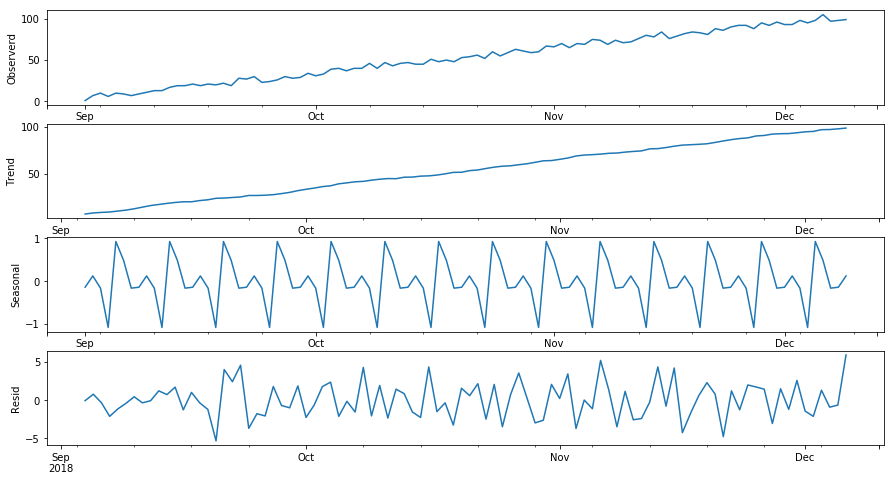

In [17]:
result= seasonal_decompose(series, model='additive')#, freq=2)  # 프리퀀시 설정없이
plot_decompose(result)

In [150]:
seasonal_decompose?
# freq : int, optional
#     Frequency of the series. Must be used if x is not a pandas object.
#     Overrides default periodicity of x if x is a pandas object with a timeseries index. # 무시하다.

In [30]:
series = pd.Series([i**2+np.random.randint(1000) for i in range(1,100)])
result= seasonal_decompose(series, model='multiplicative', freq= 8)

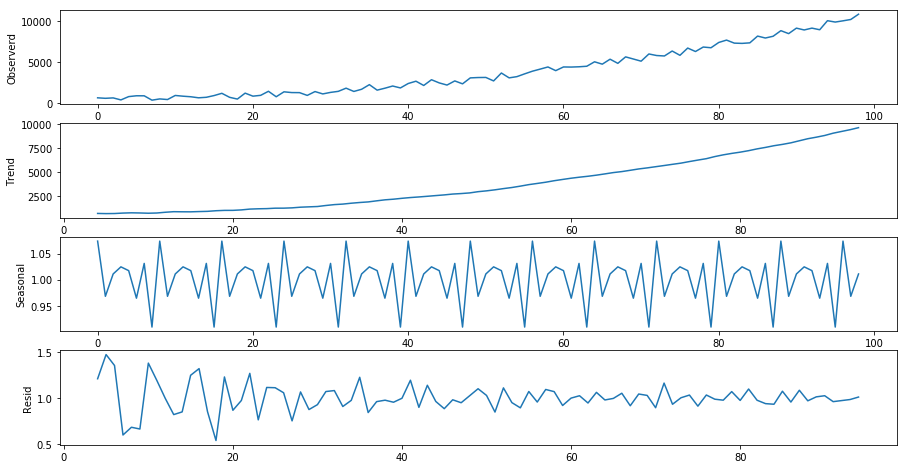

In [31]:
plot_decompose(result)

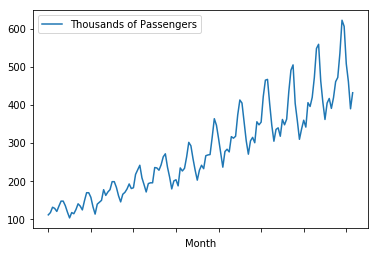

In [98]:
airline= pd.read_csv('./tsa-tutorial/data/airline_passengers.csv', index_col='Month')
airline.plot()

In [99]:
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [100]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


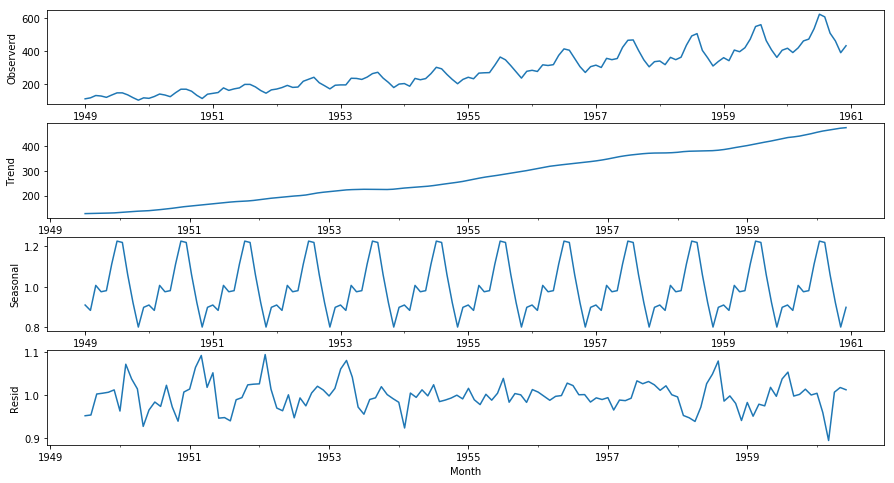

In [35]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')
plot_decompose(result)

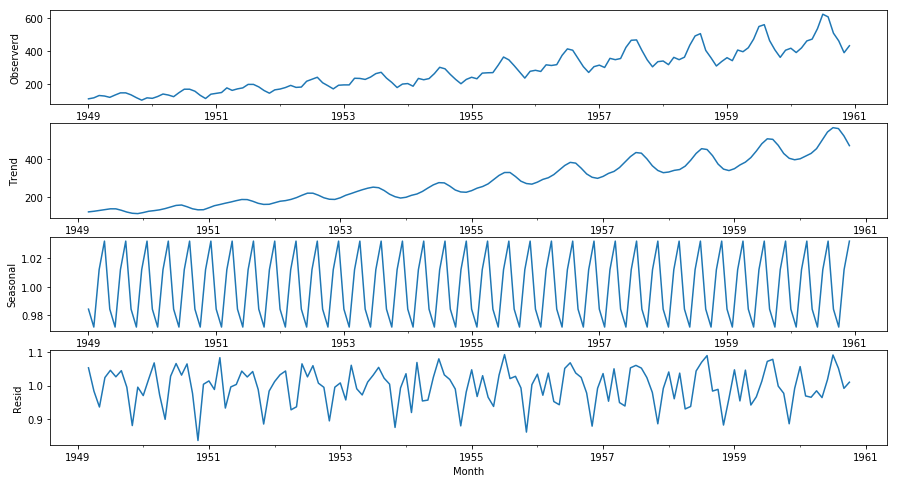

In [36]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative', freq=4)
plot_decompose(result)

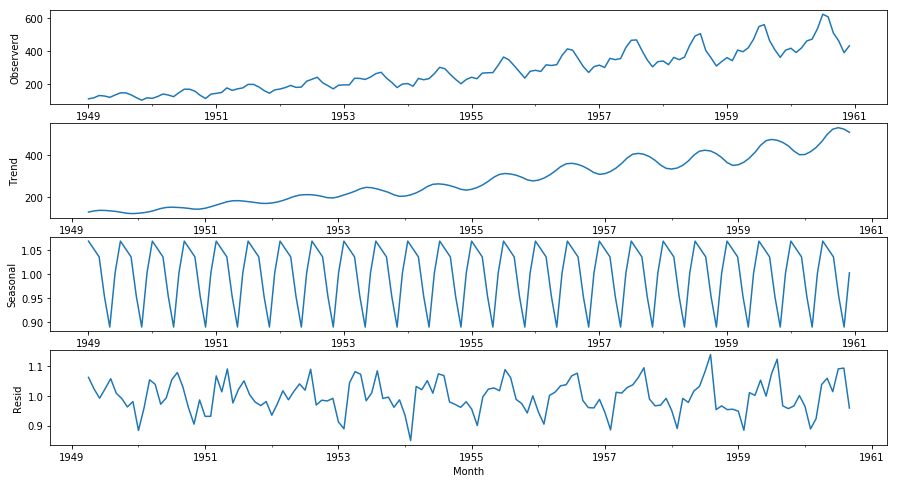

In [194]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative', freq=6)
plot_decompose(result)

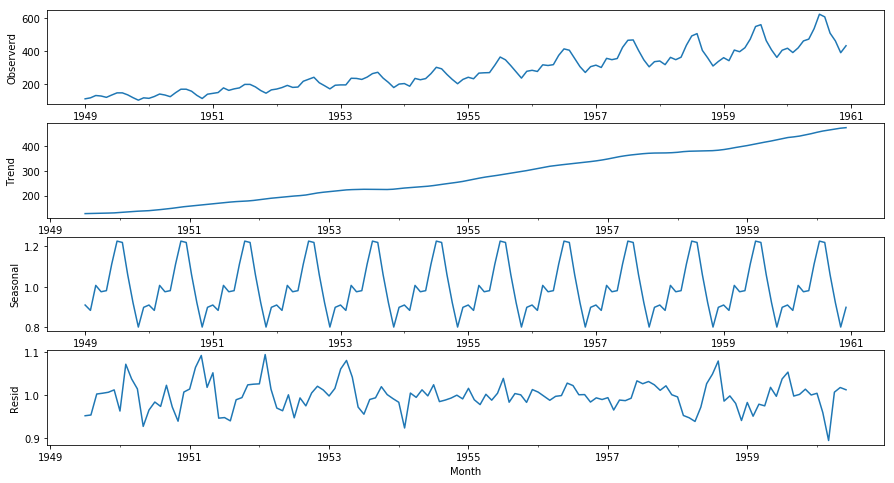

In [189]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative', freq=12)
plot_decompose(result)

In [ ]:
result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative', freq=18)
plot_decompose(result)

In [ ]:
# ETS decomposition은 주기성을 찾아준다기보다는 (알맞은 주기값으로 분리해준다기보다)
# 특정 주기를 가정하고 분리해주는 역할을 한다.

In [33]:
# SMA -> simple moving average
# WMA -> weighted moving average
# EWMA -> Exponentially Weighted Moving Average -> SES와 같은 의미?
# SES -> Simple Exponential Smoothing (단일지수평활, 1957)
## (F1=F0+a(A0-F0) -> F1= aA0+(1-a)F0)
# 상기 모델들은 트렌드(추세)와 시즈널리티(계절성)를 반영하지 못한다.
# Holt's, Holt-Winter's (1965)



In [101]:
airline= pd.read_csv('./tsa-tutorial/data/airline_passengers.csv', index_col='Month', parse_dates= True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [102]:
airline['6_SMA']= airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12_SMA']= airline['Thousands of Passengers'].rolling(window=12).mean()
airline.head(20)

,Thousands of Passengers,6_SMA,12_SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


TypeError: float() argument must be a string or a number, not 'Period'

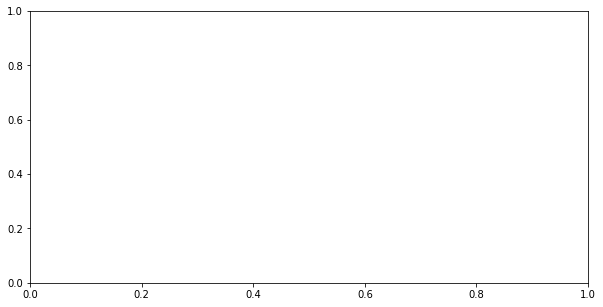

In [103]:
airline.plot(figsize=(10,5))

In [5]:
from sklearn.metrics import mean_squared_error

airline2= airline[['Thousands of Passengers', '6_SMA']].dropna()
print(np.sqrt(mean_squared_error(airline2['Thousands of Passengers'], airline2['6_SMA'])))
airline2= airline[['Thousands of Passengers', '12_SMA']].dropna()
print(np.sqrt(mean_squared_error(airline2['Thousands of Passengers'], airline2['12_SMA'])))

45.73551148059554
48.00924259647008


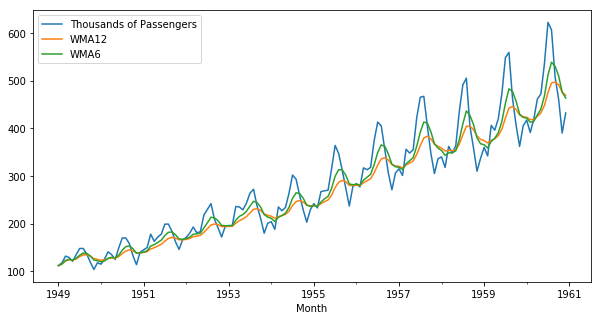

In [6]:
airline['WMA12']= airline['Thousands of Passengers'].ewm(span=12).mean()
airline['WMA6']= airline['Thousands of Passengers'].ewm(span=6).mean()
airline[['Thousands of Passengers', 'WMA12', 'WMA6']].plot(figsize=(10,5))

In [7]:
from statsmodels.tsa.api import SimpleExpSmoothing

train= airline[:'1958']
test= airline['1959':] # 인덱싱이 좀 다르다??

In [8]:
train.tail()

,Thousands of Passengers,6_SMA,12_SMA,WMA12,WMA6
Month,,,,,
1958-08-01,505,417.333333,379.500000,404.249732,436.381685
1958-09-01,404,424.333333,379.500000,404.211311,427.129775
1958-10-01,359,426.166667,380.500000,397.255725,407.664125
1958-11-01,310,417.333333,380.916667,383.831767,379.760089
1958-12-01,337,401.000000,381.000000,376.626880,367.542921


In [9]:
test.head()

,Thousands of Passengers,6_SMA,12_SMA,WMA12,WMA6
Month,,,,,
1959-01-01,360,379.166667,382.666667,374.068898,365.387801
1959-02-01,342,352.000000,384.666667,369.135222,358.705572
1959-03-01,406,352.333333,388.333333,374.806726,372.218266
1959-04-01,396,358.500000,392.333333,378.067230,379.013047
1959-05-01,420,376.833333,397.083333,384.518425,390.723605


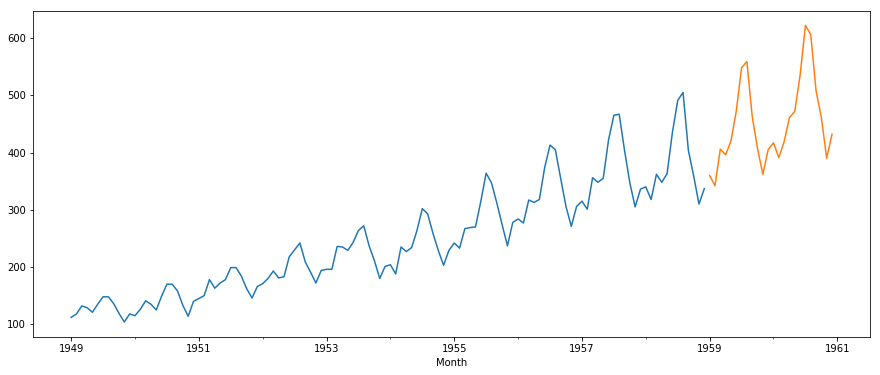

In [10]:
train['Thousands of Passengers'].plot(figsize=(15,6))
test['Thousands of Passengers'].plot()

In [11]:
ses_model = SimpleExpSmoothing(np.asarray(train['Thousands of Passengers']))
ses_result = ses_model.fit()

In [12]:
ses_result.forecast?
SimpleExpSmoothing?

In [13]:
y_hat = test.copy()

In [14]:
y_hat['SES'] = ses_result.forecast(len(test))

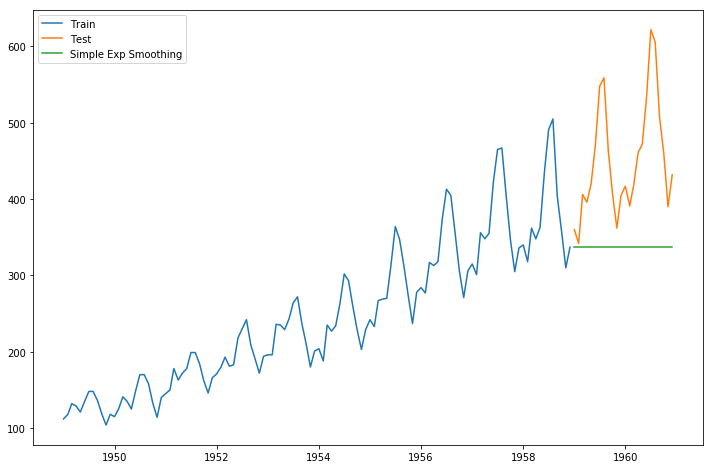

In [15]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['SES'], label='Simple Exp Smoothing')
plt.legend()
# 트렌드와 패턴이 전혀 반영이 되지 않는다. 레벨만 보임.

In [16]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['SES']))
rmse

137.32898455897794

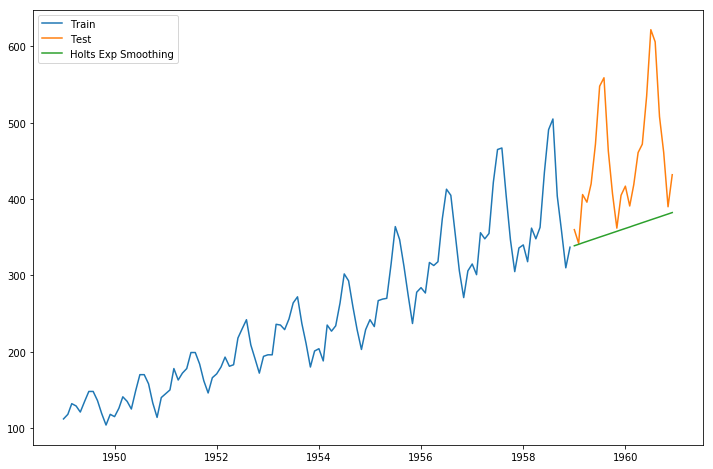

In [17]:
# Holt's Exponential Smoothing

from statsmodels.tsa.api import Holt

holt_model = Holt(np.asarray(train['Thousands of Passengers']))
holt_result = holt_model.fit()
y_hat['HOLT'] = holt_result.forecast(len(test))
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['HOLT'], label='Holts Exp Smoothing')
plt.legend()

# 레벨과 트렌드가 보임. 패턴은 없음.

In [18]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'], y_hat['HOLT']))
rmse

115.70340937334673

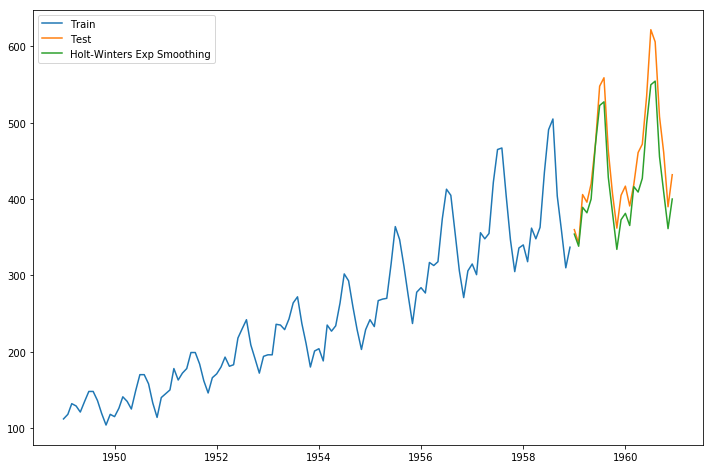

In [19]:
# Holt Winter's Exponential Smoothing
# 트렌드와 시즈널리티가 확실한 경우 -> 홀트윈터스로 꽤 정확한 예측모델을 만들수있다.

from statsmodels.tsa.api import ExponentialSmoothing

winter_model = ExponentialSmoothing(
    np.asarray(train['Thousands of Passengers']),
    seasonal_periods=12, trend='add', seasonal='add') # 적합한 시즈널리티의 주기를 설정해야한다.

winter_result = winter_model.fit()
y_hat['WINTER'] = winter_result.forecast(len(test))
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['WINTER'], label='Holt-Winters Exp Smoothing')
plt.legend()


In [20]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['WINTER']))
rmse

34.89744430873829

In [21]:
# 아리마 모델
# ARIMA 트렌드있으면(p,d,q) 시즈널리티까지 있으면 추가 (P,D,Q)m , 파라미터가 3개 또는 7개까지 있다.
# 그리드 서치로 하이퍼파라미터를 찾아내야한다.
import statsmodels.api as sm

arima = sm.tsa.statespace.SARIMAX(train['Thousands of Passengers'],
                                  order=(2,1,1), # (p,d,q)
                                  seasonal_order=(0,1,0,12), #(P,D,Q,m) #m값 12달
                                  enforce_stationarity=False,
                                  enforce_invertibility=False)

C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [22]:
arima_result = arima.fit()

In [23]:
y_hat['ARIMA'] = arima_result.predict(start='1959-01-01', end='1960-12-01', dynamic=True)
# predict와 forcast의 차이
# dynamic의 의미

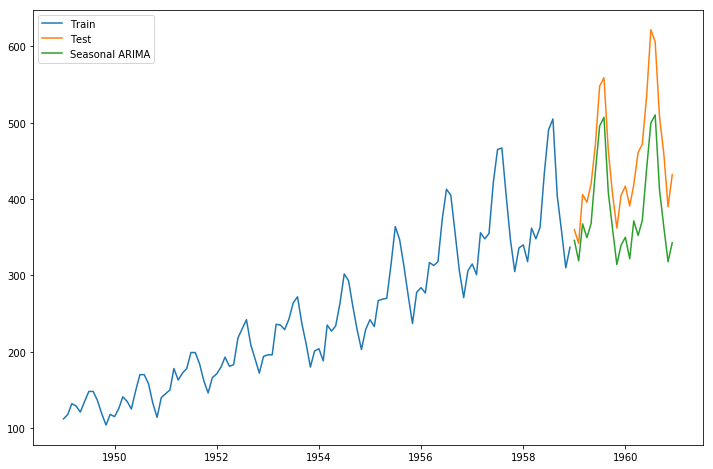

In [24]:
plt.figure(figsize=(12,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['ARIMA'], label='Seasonal ARIMA')
plt.legend()

In [25]:
rmse = np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['ARIMA']))
rmse

71.69370477634274

In [ ]:
# 1950년에 만들어진 오래된 모델, ARIMA모델
# 페이스북에서 시계열분석하는 api있음.-> 찾아보기
# 스테이셔너리한 특성은 어떤것인지?
# (1) 연속되는 숫자들의 평균이 타임invariant
# (2) 연속되는 숫자들의 분산이
# (3) 연속되는 숫자들의 공분산이
# 아리마모델은 스테이셔너리 특성을 보일때 효과적
# 시계열데이터가 논스테이셔러니한다면 디퍼런싱을 한다.

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

df= pd.read_csv('./tsa-tutorial/data/monthly-milk-production.csv', index_col='Month', parse_dates= True)
df.head()

,pounds per cow
Month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


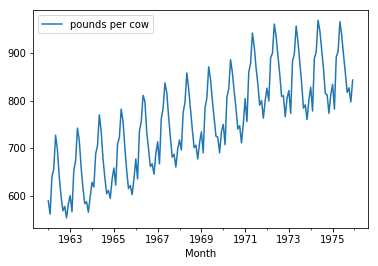

In [96]:
df.plot()
# 트렌드와 시즈널리티가 보인다.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
pounds per cow    168 non-null int64
dtypes: int64(1)
memory usage: 2.6 KB


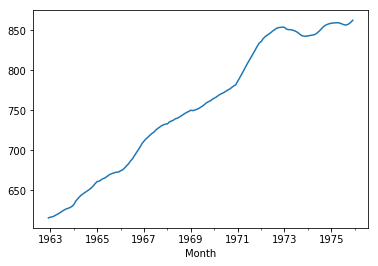

In [98]:
timeseries= df['pounds per cow']
timeseries.rolling(12).mean().plot()
# 트렌드 확인 (시즈널리티를 없앤 추세를 확인할수있다.)

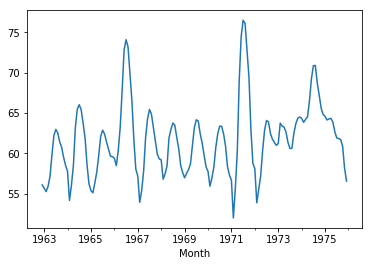

In [99]:
timeseries.rolling(12).std().plot()
# 분산은 타임인베리언트 하지 않다. (1966, 1971에서 많이 튄다.)

<Figure size 432x288 with 0 Axes>

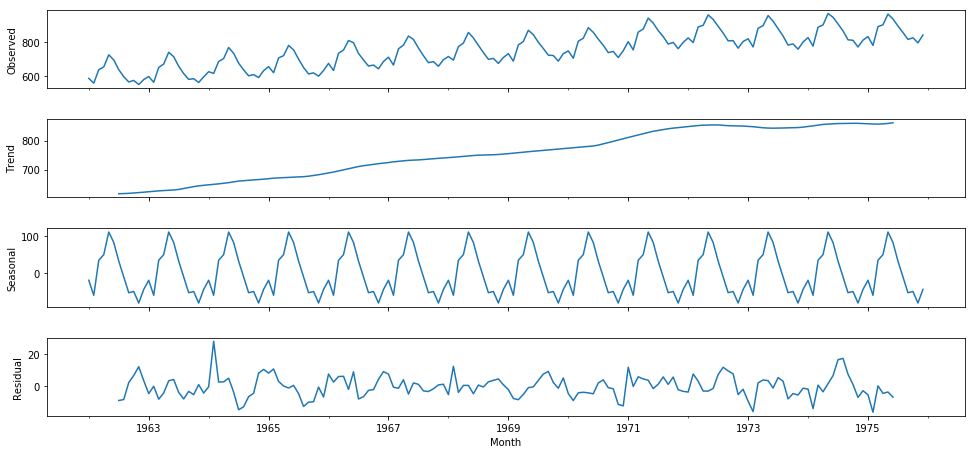

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition= seasonal_decompose(df['pounds per cow'])
fig= plt.figure()
fig= decomposition.plot()
fig.set_size_inches(15,7)

In [101]:
# 정상시계열인가?

from statsmodels.tsa.stattools import adfuller

result= adfuller(df['pounds per cow'])
# 2번째값 p값이 0.05보다 작으면 스테이셔너리하다.
def adf_check(ts):
    result= adfuller(ts)
    if result[1] <= 0.05:
        print('Stationary {}'.format(result[1]))
    else:
        print('Non-Stationary {}'.format(result[1]))

adf_check(df['pounds per cow'])


Non-Stationary 0.6274267086030316


In [102]:
# 비정상시계열 -> 디퍼런싱을해서 정상시계열로 만들어준다.
df['1st diff'] = df['pounds per cow'] - df['pounds per cow'].shift(1)

In [103]:
adf_check(df['1st diff'].dropna())

Stationary 0.030068004001785647


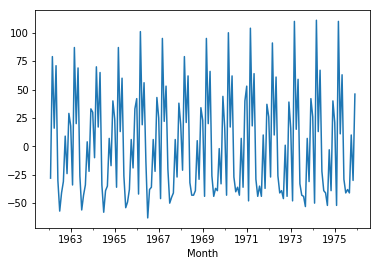

In [104]:
df['1st diff'].plot()

In [105]:
df['2nd diff'] =  df['1st diff'] - df['1st diff'].shift()

In [106]:
adf_check(df['2nd diff'].dropna())

Stationary 1.1126989332084581e-26


In [107]:
# 시즈널 디퍼런싱을 해준다?
df['seasonal diff'] = df['pounds per cow'] - df['pounds per cow'].shift(12)

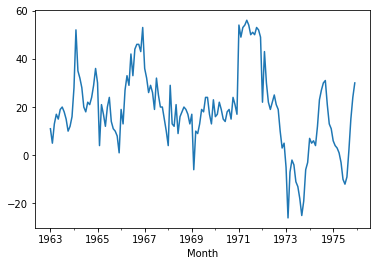

In [108]:
df['seasonal diff'].plot()

In [109]:
adf_check(df['seasonal diff'].dropna())

Non-Stationary 0.1607988052771135


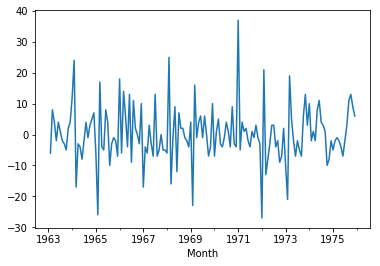

In [110]:
df['seasonal 1st dff']= df['1st diff'] - df['1st diff'].shift(12)
df['seasonal 1st dff'].plot()

In [111]:
adf_check(df['seasonal 1st dff'].dropna())

Stationary 1.8654234318788342e-05


In [112]:
d 파라미터를 찾았다!
d=1, D=1 (대문자 D는 시즈널)

SyntaxError: invalid syntax (<ipython-input-112-1c464db89097>, line 1)

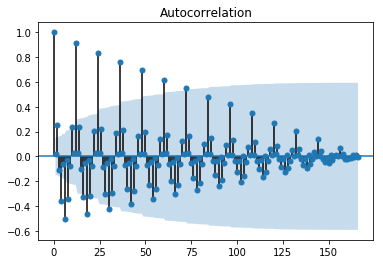

In [113]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['1st diff'].dropna());

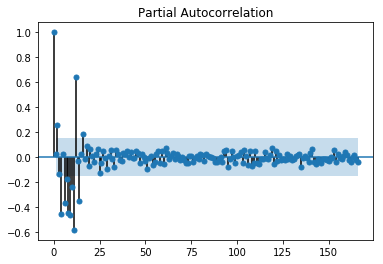

In [114]:
plot_pacf(df['1st diff'].dropna(), method='ywm');

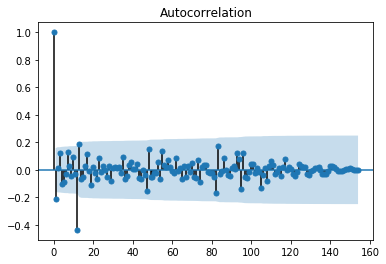

In [115]:
plot_acf(df['seasonal 1st dff'].dropna());
# 대문자 Q=1

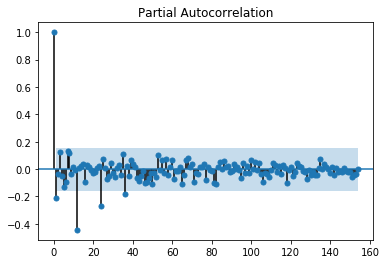

In [116]:
plot_pacf(df['seasonal 1st dff'].dropna(), method='ywm'); # 버그 method='ywm'를 추가해준다.
#대문자 P=1

In [137]:
# 시즈널 파라미터를 찾았다!
# P=1, Q=1 
# 결론,
# p=0, d=1, q=0 (p와 q를 찾기가 애매해서 0으로 잡았다)
# P=1, D=1, Q=1
# 추후 그리드 서치를 이용해 파라미터를 찾을수있다.

In [118]:
model= sm.tsa.statespace.SARIMAX(df['pounds per cow'], order=(0,1,0), seasonal_order=(1,1,1,12))
result= model.fit()

C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [119]:
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:                     pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Thu, 16 May 2019   AIC                           1074.131
Time:                                    20:48:55   BIC                           1083.261
Sample:                                01-01-1962   HQIC                          1077.839
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

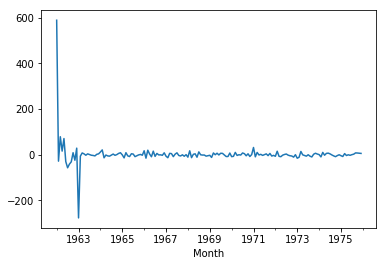

In [120]:
# 결과의 레지듀얼을 확인한다.
result.resid.plot() # 내부적으로 피팅은 레지듀얼이 작아지는 방향으로 코이피션트를 정한다.

In [123]:
result.resid.describe()

count    168.000000
mean       1.882675
std       52.036443
min     -276.500828
25%       -6.001292
50%       -0.546783
75%        5.081997
max      589.000000
dtype: float64

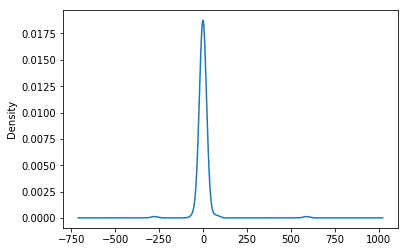

In [121]:
result.resid.plot(kind='kde') # 가우시안분포를 보여주면 좋다.

In [124]:
len(df['pounds per cow'])

168

In [139]:
result

In [135]:
df['forecast']= result.predict(start=150, end=168, dynamic= True)

In [136]:
df['forecast'].tail()

Month
1975-08-01    879.668975
1975-09-01    832.328555
1975-10-01    837.722251
1975-11-01    802.452737
1975-12-01    842.499871
Name: forecast, dtype: float64

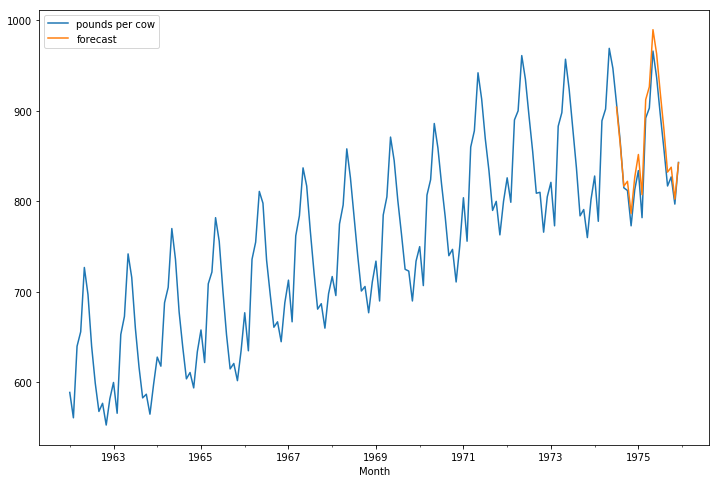

In [138]:
df[['pounds per cow', 'forecast']].plot(figsize=(12,8))

In [ ]:
# ARIMA and Rolling Forecast

In [3]:
shampoo = pd.read_csv('./tsa-tutorial/data/sales-of-shampoo.csv', index_col='Month', parse_dates=True)
shampoo.head()

,Sales of shampoo
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [17]:
from datetime import datetime

def dateparser(x):
    return datetime.strptime('190'+x, "%Y-%m")
    #return pd.to_datetime('201'+x)
    
shampoo = pd.read_csv('./tsa-tutorial/data/sales-of-shampoo.csv', index_col='Month', 
                      parse_dates=True, date_parser= dateparser)
shampoo.head()

,Sales of shampoo
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [19]:
shampoo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 1901-01-01 to 1903-12-01
Data columns (total 1 columns):
Sales of shampoo    36 non-null float64
dtypes: float64(1)
memory usage: 576.0 bytes


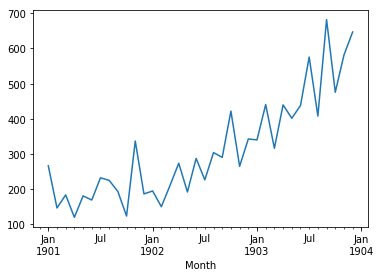

In [21]:
shampoo['Sales of shampoo'].plot()

In [22]:
from statsmodels.tsa.stattools import adfuller

def adf_check(ts):
    result = adfuller(ts)
    if result[1] <= 0.05:
        print('Stationary {}'.format(result[1]))
    else:
        print('Non-Stationary {}'.format(result[1]))
        
adf_check(shampoo['Sales of shampoo'])

Non-Stationary 1.0


In [23]:
shampoo['1st diff'] = shampoo['Sales of shampoo'] - shampoo['Sales of shampoo'].shift(1)

In [24]:
adf_check(shampoo['1st diff'].dropna())

Stationary 1.7998574141687034e-10


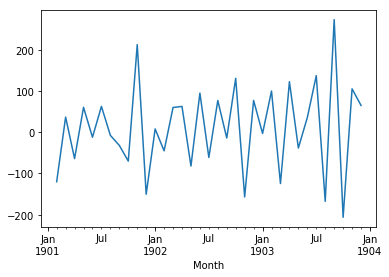

In [25]:
shampoo['1st diff'].plot()

In [26]:
shampoo['2nd diff'] = shampoo['1st diff'] - shampoo['1st diff'].shift()
adf_check(shampoo['2nd diff'].dropna())

Stationary 0.0039063349396599245


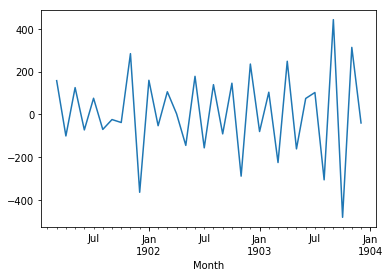

In [27]:
shampoo['2nd diff'].plot()

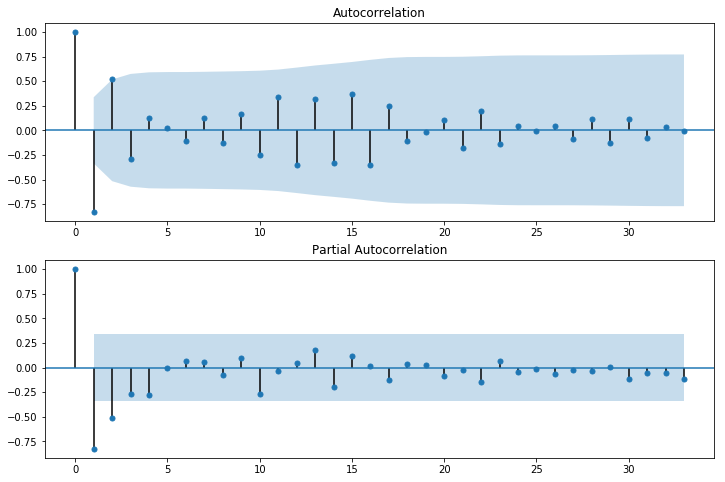

In [28]:
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
fig = plot_acf(shampoo['2nd diff'].dropna(), ax=ax1)
fig = plot_pacf(shampoo['2nd diff'].dropna(), ax=ax2, method='ywm')

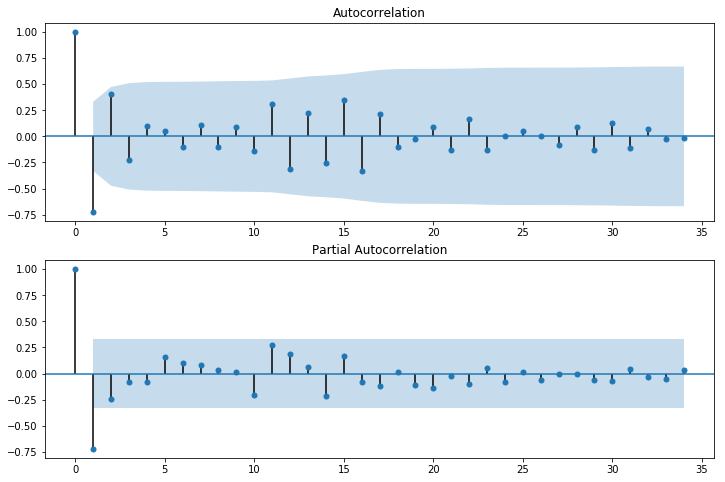

In [29]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(shampoo['1st diff'].dropna(), ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(shampoo['1st diff'].dropna(), ax=ax2, method='ywm')

In [30]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(shampoo['Sales of shampoo'], order=(1,1,1), freq='MS')
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:     D.Sales of shampoo   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Thu, 16 May 2019   AIC                            402.467
Time:                        19:30:02   BIC                            408.688
Sample:                    02-01-1901   HQIC                           404.614
                         - 12-01-1903                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       12.0965      3.651      3.313      0.002       4.940      19.253
ar.L1.D.Sales of shampoo    -0.5674      0.161     -3.526      0.001      -0.883      -0.

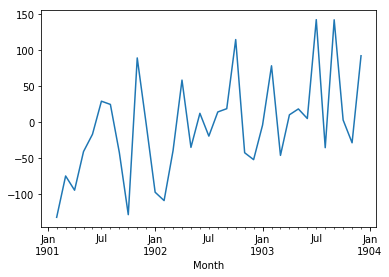

In [31]:
model_fit.resid.plot()

In [32]:
model_fit.resid.describe()

count     35.000000
mean      -5.505061
std       69.978605
min     -132.196495
25%      -42.395514
50%       -4.181296
75%       21.540175
max      142.155216
dtype: float64

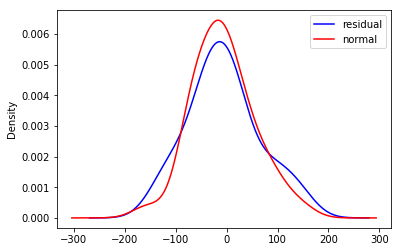

In [42]:
import math
import matplotlib.pyplot as plt


# 모형의 잔차가 정규분포 특성을 가지고 있는지 확인한다.
model_fit.resid.plot(kind='kde', c='b', label='residual')

resid2= np.random.normal(-5.5,60, size=35)
pd.Series(resid2).plot(kind='kde', c='r', label= 'normal')

plt.legend()
plt.show()

In [47]:
# Grid Search
# AIC를 기준으로 최적의 p,d,q 파라메터를 찾는다.

import itertools

p= range(0,5)
d= range(1,3)
q= range(0,5)

pdq= list(itertools.product(p,d,q))


In [54]:
aic_params = []

for param in pdq:
    try:
        mod = ARIMA(shampoo['Sales of shampoo'], order=param).fit()
        #results = mod.fit(disp=0)
        #print('ARIMA{} - AIC:{}'.format(param, results.aic))
        aic_params.append((mod.aic, param,))
    except:
        pass


C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\e

C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\e

C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Miniconda3\env

In [55]:
aic_params

[(430.87311187552797, (0, 1, 0)),
 (409.0126622411773, (0, 1, 1)),
 (461.1578257086931, (0, 2, 0)),
 (424.58251536560675, (0, 2, 1)),
 (406.02228959235015, (1, 1, 0)),
 (402.4666524180001, (1, 1, 1)),
 (401.5247943797664, (1, 1, 2)),
 (403.52417287501396, (1, 1, 3)),
 (423.90008603782104, (1, 2, 0)),
 (389.905759118353, (1, 2, 3)),
 (403.6275641166603, (2, 1, 0)),
 (404.28621423318384, (2, 1, 1)),
 (412.9993824970465, (2, 2, 0)),
 (396.65262586598186, (2, 2, 1)),
 (389.6834635234351, (2, 2, 3)),
 (404.6924591816536, (3, 1, 0)),
 (406.1395443929499, (3, 1, 1)),
 (406.67979078559085, (3, 1, 4)),
 (410.91092658458166, (3, 2, 0)),
 (396.3062365835526, (3, 2, 1)),
 (391.5852337351679, (3, 2, 2)),
 (406.10492945161246, (3, 2, 3)),
 (404.78676855670926, (4, 1, 0)),
 (406.5796403612153, (4, 1, 1)),
 (400.2307795387977, (4, 1, 2)),
 (400.6567725868804, (4, 1, 3)),
 (406.3808484358775, (4, 1, 4)),
 (403.94822895066847, (4, 2, 0)),
 (393.154075094501, (4, 2, 1)),
 (402.5718450260111, (4, 2, 3))]

In [68]:
model = ARIMA(shampoo['Sales of shampoo'], order=(2,2,3))
results2 = model.fit()
print(results2.summary())

C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARIMA Model Results                              
Dep. Variable:     D2.Sales of shampoo   No. Observations:                   34
Model:                  ARIMA(2, 2, 3)   Log Likelihood                -187.842
Method:                        css-mle   S.D. of innovations             49.748
Date:                 Thu, 16 May 2019   AIC                            389.683
Time:                         19:48:17   BIC                            400.368
Sample:                     03-01-1901   HQIC                           393.327
                          - 12-01-1903                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.9216      0.101      9.092      0.000       0.723       1.120
ar.L1.D2.Sales of shampoo    -1.4817      0.138    -10.705      0.000      -1.

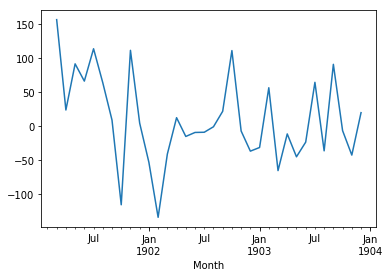

In [69]:
results2.resid.plot()

In [70]:
results2.resid.describe()

count     34.000000
mean       9.955698
std       65.408540
min     -133.526938
25%      -34.800986
50%       -3.554850
75%       61.998881
max      156.378383
dtype: float64

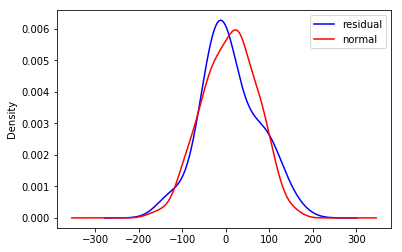

In [71]:
import math
import matplotlib.pyplot as plt


# 모형의 잔차가 정규분포 특성을 가지고 있는지 확인한다.
results2.resid.plot(kind='kde', c='b', label='residual')

resid2= np.random.normal(10,65, size=500)
pd.Series(resid2).plot(kind='kde', c='r', label= 'normal')

plt.legend()
plt.show()

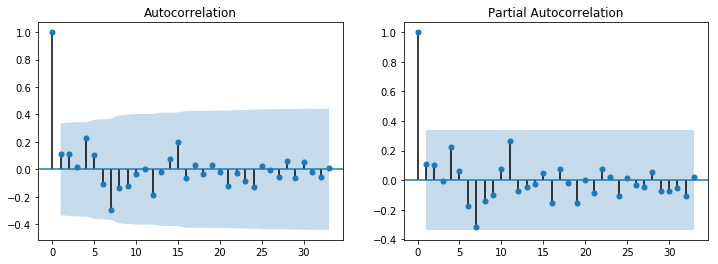

In [72]:
fig= plt.figure(figsize=(12,4))
p1= fig.add_subplot(1,2,1)
p2= fig.add_subplot(1,2,2)
plot_acf(results2.resid, p1)
plot_pacf(results2.resid, p2,method='ywm') 
plt.show()

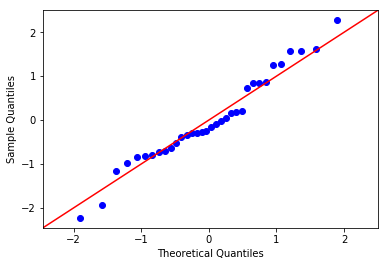

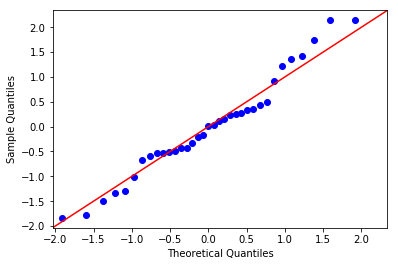

In [74]:
# Q-Q plot, 정규분포에 가까울수록 직선임.
from statsmodels.graphics.gofplots import qqplot
fig= qqplot(results2.resid, fit=True, line='45')
fig= qqplot(model_fit.resid, fit=True, line='45')
plt.show()

In [141]:
print(len(shampoo['Sales of shampoo']))
print(int(len(shampoo['Sales of shampoo']) * 0.66))

36
23


In [142]:
model = ARIMA(shampoo['Sales of shampoo'], order=(3,2,1)) #(4,2,1)
results2= model.fit(disp=0)

C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [144]:
shampoo['Sales of shampoo'].tail()

Month
1903-08-01    407.6
1903-09-01    682.0
1903-10-01    475.3
1903-11-01    581.3
1903-12-01    646.9
Name: Sales of shampoo, dtype: float64

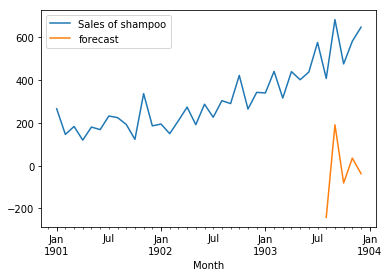

In [149]:
shampoo['forecast']= results2.predict(start='1903-08-01', end='1903-12-01', dynamic= True)
shampoo[['Sales of shampoo','forecast']].plot()


In [146]:
shampoo['forecast'].tail()

Month
1903-08-01   -241.219141
1903-09-01    190.694937
1903-10-01    -81.015137
1903-11-01     35.225891
1903-12-01    -37.266175
Name: forecast, dtype: float64

## Rolling Forecast ARIMA Model

ARIMA 모델로 미래 데이터를 예측하기 위해 predict() 함수를 사용합니다. 이 함수는 파라메터로 예측할 타임스텝을(steps) 필요로하는데 학습 데이터에대한 인덱스 상대값을 입력하면 됩니다. 가령 모델을 학습하기 위해 100개의 학습데이터를 사용했다면 다음 스텝 예측값의 인덱스는 start=101, end=101 이 됩니다. 예측 결과 리턴값은 하나의 예측값을 포함한 배열이 됩니다.

또는 forcast() 함수로 파라메터 없이 다음 한 스템의 데이터를 예측할 수 있습니다. 

데이터를 train 과 test 로 나눈 뒤 train 데이터로 모델을 학습시키고 test 데이터의 각 시점에 해당하는 예측 해봅니다. 그러기 위해 새로운 actual value 를 하나씩 수집하면서 그와 함께 앞선 시점의 데이터로 ARIMA 모델을 학습과 예측을 반복하는 rolling forecast 를 수행하게 됩니다.

아래 코드에서 수동으로 관측값을을 history 변수에 추가해가면서 모델링과 예측을 반복하면서 prediction 과 expected value 를 출력하고 최종적으로 그에 따른 mean squared error (MSE) 를 계산합니다.

In [216]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = shampoo['Sales of shampoo'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = train[:].copy()
predictions = []


In [202]:
ARIMA?

In [211]:
for t in range(len(test)):
    model = ARIMA(history, order=(3,1,1), freq=None) #(4,2,1)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predictions.append(output[0])
    history= X[0:size+t+1].copy()

C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Miniconda3\e

In [217]:
predictions

NameError: name 'array' is not defined

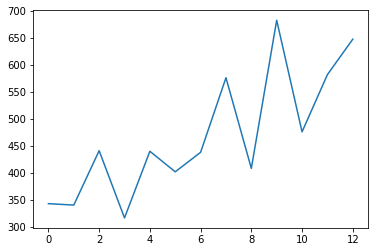

In [219]:
plt.plot(test)
plt.plot(predictions, color='red')

In [241]:
# Rolling Forcast ARIMA Model
# predict와 forcast의 차이점??


from sklearn.metrics import mean_squared_error
from math import sqrt

X = shampoo['Sales of shampoo'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(3,2,1)) #(4,2,1), (3,2,1)
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    # predicted value
    yhat = output[0]
    predictions.append(yhat)
    # actual value
    obs = test[t]
    # actual value 를 다음 스텝에서 학습할 데이터에 추가
    history.append(obs)

error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % sqrt(error))






ValueError: The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.

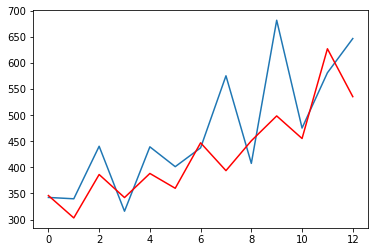

In [221]:
plt.plot(test)
plt.plot(predictions, color='red')

In [242]:
import statsmodels.api as sm

model= sm.tsa.statespace.SARIMAX(shampoo['Sales of shampoo'], order=(4,2,1), seasonal_order=(0,0,0,0))
result= model.fit?
print(result.summary())

                           Statespace Model Results                           
Dep. Variable:       Sales of shampoo   No. Observations:                   36
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -198.838
Date:                Thu, 16 May 2019   AIC                            407.677
Time:                        21:54:04   BIC                            415.454
Sample:                    01-01-1901   HQIC                           410.361
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0515      0.346     -0.149      0.881      -0.729       0.626
ar.L2          0.6347      0.331      1.917      0.055      -0.014       1.284
ar.L3          0.3638      0.174      2.088      0.0

C:\Miniconda3\envs\py64\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [233]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = shampoo['Sales of shampoo'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
    #model = ARIMA(history, order=(3,1,1)) #(4,2,1), (3,2,1)
    model = sm.tsa.statespace.SARIMAX(history, order=(3,1,1), seasonal_order=(0,0,0,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    # predicted value
    yhat = output[0]
    predictions.append(yhat)
    # actual value
    obs = test[t]
    # actual value 를 다음 스텝에서 학습할 데이터에 추가
    history.append(obs)

error = mean_squared_error(test, predictions)
print('Test RMSE: %.3f' % sqrt(error))


Test RMSE: 94.683


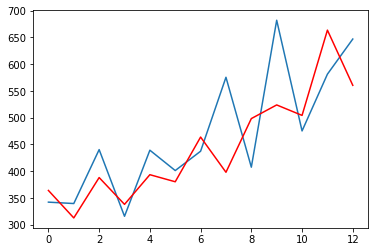

In [229]:
plt.plot(test)
plt.plot(predictions, color='red')

In [4]:
# Prophet사용하기
#https://zzsza.github.io/data/2019/02/06/prophet/

In [ ]:
from fbprophet import Prophet
# ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
# conda install plotly

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

#df= pd.read_csv('./tsa-tutorial/data/monthly-milk-production.csv', index_col='Month', parse_dates= True)
df= pd.read_csv('./tsa-tutorial/data/airline_passengers.csv', index_col='Month', parse_dates= True)
df.head()

#df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


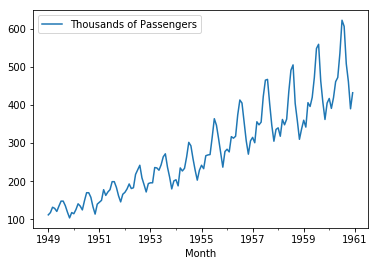

In [115]:
# prophet설치 후 df.plot()에러
# float() argument must be a string or a number, not 'Period'
pd.plotting.register_matplotlib_converters() # 추가
df.plot()

In [116]:
df['ds'] = df.index
df.head()

,Thousands of Passengers,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01


In [117]:
df.columns = ['y', 'ds']
df.head()

,y,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01


In [121]:
df.tail()

,y,ds
Month,,
1960-08-01,606,1960-08-01
1960-09-01,508,1960-09-01
1960-10-01,461,1960-10-01
1960-11-01,390,1960-11-01
1960-12-01,432,1960-12-01


In [118]:
m = Prophet() # Default growth='linear'
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [119]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
504,1961-11-27
505,1961-11-28
506,1961-11-29
507,1961-11-30
508,1961-12-01


In [120]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
504,1961-11-27,520.678663,470.229657,526.540521,520.118447,521.265332,-22.465788,-22.465788,-22.465788,-22.465788,-22.465788,-22.465788,0.0,0.0,0.0,498.212874
505,1961-11-28,520.779122,466.891860,524.069319,520.215802,521.367872,-24.088844,-24.088844,-24.088844,-24.088844,-24.088844,-24.088844,0.0,0.0,0.0,496.690278
506,1961-11-29,520.879581,465.051294,524.528756,520.313158,521.471785,-26.342491,-26.342491,-26.342491,-26.342491,-26.342491,-26.342491,0.0,0.0,0.0,494.537090
507,1961-11-30,520.980041,462.916058,520.494228,520.410513,521.576116,-29.182323,-29.182323,-29.182323,-29.182323,-29.182323,-29.182323,0.0,0.0,0.0,491.797718
508,1961-12-01,521.080500,462.273328,516.719392,520.507868,521.680446,-32.548774,-32.548774,-32.548774,-32.548774,-32.548774,-32.548774,0.0,0.0,0.0,488.531726


In [124]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.637236,54.196706,114.051786
1,1949-02-01,78.052782,48.680699,106.809603
2,1949-03-01,110.256234,83.668496,140.443516
3,1949-04-01,107.735292,78.118222,136.618040
4,1949-05-01,111.242092,81.190079,140.115367


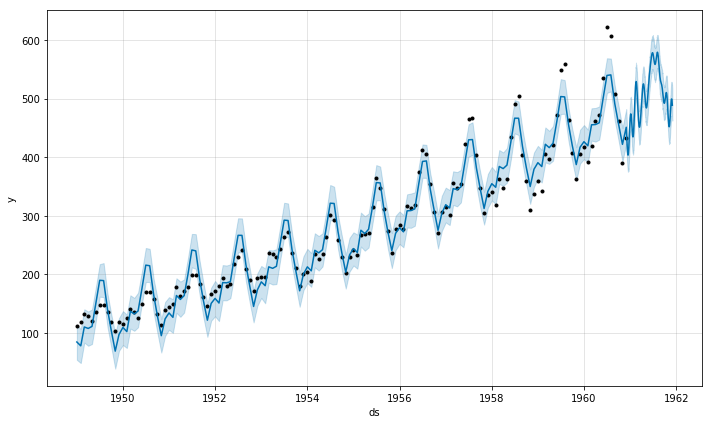

In [125]:
fig1 = m.plot(forecast)

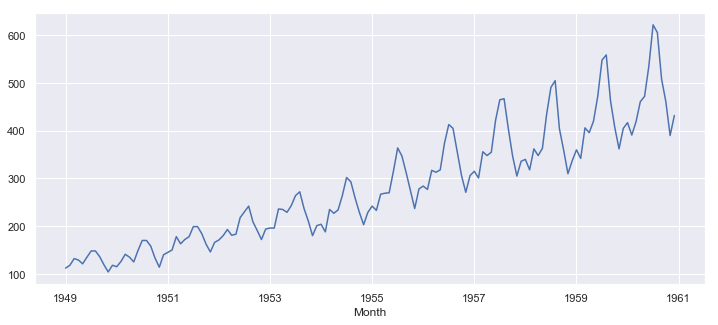

In [131]:
import seaborn as sns
sns.set()
df['y'].plot(figsize=(12,5))

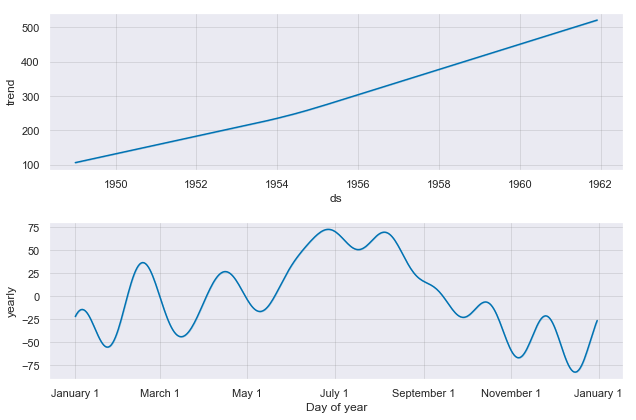

In [132]:
fig2 = m.plot_components(forecast)